In [50]:
import geopandas as gpd
import numpy as np
from rasterstats import zonal_stats

In [25]:
quadricula = '3316-221'
laz_path = '../LiDAR-Sampa-2020'
bhm_path = '../sampa-lidar/results/2020'

In [43]:
gdf_lotes = gpd.read_file('downloads/lotes/IPTU-SP-todos-atributos-por-lotes-90-vila-mariana.gpkg')
_ = gdf_lotes.to_crs(epsg=31983, inplace=True)

In [8]:
gdf_quadriculas = gpd.read_file('zip://downloads/SIRGAS_SHP_quadriculamdt.zip!/SIRGAS_SHP_quadriculamdt/')
_ = gdf_quadriculas.set_crs(epsg=31983, inplace=True)

In [37]:
gdf_quadriculas[gdf_quadriculas.loc[:, 'qmdt_cod'] == quadricula]

,qmdt_cod,geometry
2698,3316-221,"POLYGON ((332056.790 7390360.987, 332050.159 7..."


In [28]:
coords = [[xy[0], xy[1]] for xy in gdf_quadriculas.set_index('qmdt_cod').loc[quadricula].geometry.exterior.coords]
xy_max = np.max(np.array(coords), axis=0) 
xy_min = np.min(np.array(coords), axis=0)

In [ ]:
# TODO
# cortar o arquivo de cadastro (Lotes) pela quadricula
# abrir o BHM
# Comparar ao arquivo de cadastro

/var/folders/4v/rx_d3gzj4991_pw5_skhl0980000gn/T/ipykernel_14870/1365512724.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:31983
Right CRS: None

  gpd.clip(gdf_lotes, gdf_quadriculas[gdf_quadriculas.loc[:, 'qmdt_cod'] == quadricula]).plot()


<Axes: >

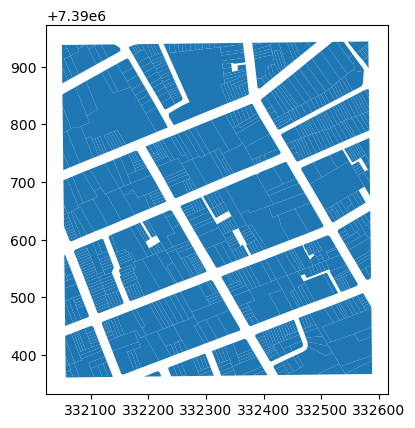

In [46]:
gpd.clip(gdf_lotes, gdf_quadriculas[gdf_quadriculas.loc[:, 'qmdt_cod'] == quadricula]).plot()

In [51]:
zonal_stats(gpd.clip(gdf_lotes, gdf_quadriculas[gdf_quadriculas.loc[:, 'qmdt_cod'] == quadricula]), '../sampa-lidar/results/2020/BHM/BHM-3316-221-2020-1m.tiff')

/var/folders/4v/rx_d3gzj4991_pw5_skhl0980000gn/T/ipykernel_14870/2098012817.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:31983
Right CRS: None

  zonal_stats(gpd.clip(gdf_lotes, gdf_quadriculas[gdf_quadriculas.loc[:, 'qmdt_cod'] == quadricula]), '../sampa-lidar/results/2020/BHM/BHM-3316-221-2020-1m.tiff')


[{'min': 2.9073798656463623,
  'max': 6.939142227172852,
  'mean': 4.949465433756511,
  'count': 9},
 {'min': 2.2165160179138184,
  'max': 87.1463394165039,
  'mean': 47.600319017563116,
  'count': 911},
 {'min': 3.5014560222625732,
  'max': 11.854028701782227,
  'mean': 6.9305269157744025,
  'count': 502},
 {'min': 5.409408092498779,
  'max': 5.87741231918335,
  'mean': 5.726078796386719,
  'count': 5},
 {'min': 5.496829509735107,
  'max': 8.483854293823242,
  'mean': 6.709808629587156,
  'count': 109},
 {'min': 5.8226447105407715,
  'max': 8.483854293823242,
  'mean': 6.763693416819853,
  'count': 136},
 {'min': 3.2096967697143555,
  'max': 11.391831398010254,
  'mean': 6.623572601131135,
  'count': 163},
 {'min': 2.1673662662506104,
  'max': 42.8907585144043,
  'mean': 32.25806574149109,
  'count': 617},
 {'min': 6.20232629776001,
  'max': 10.74030876159668,
  'mean': 7.966845172384511,
  'count': 115},
 {'min': 3.2298388481140137,
  'max': 40.26643371582031,
  'mean': 10.9180181711